# Multi-Armed Bandit Implementation

In [309]:
"""
Import two libraries meant for elementary multi-armed bandit development
"""
import numpy as np
import random
import matplotlib.pyplot as plt
import operator

In [310]:
"""
Define the three distributions that our multi-armed bandit is going to choose from or exploit.
"""
dist_one = np.random.normal(10,5,300)
dist_two = np.random.normal(8,4,300)
dist_three = np.random.normal(5,2.5,300)

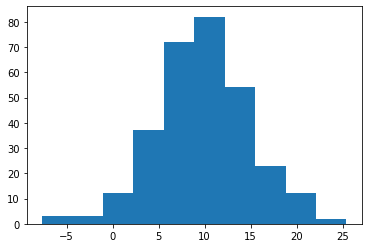

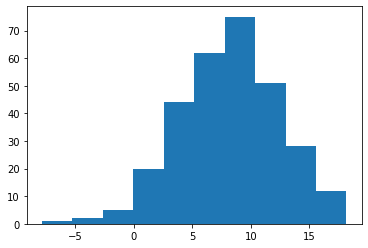

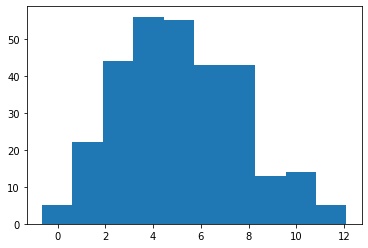

In [311]:
"""
Plot the three distributions to assess the spread.
"""
plt.hist(dist_one)
plt.show()
plt.hist(dist_two)
plt.show()
plt.hist(dist_three)
plt.show()

In [312]:
"""
For the first 3 visits, explore all three and see which one gave 
the highest and save that as the default when we want to exploit.
"""
dist_one_pick = np.random.normal(10,5) # more spread out distribution
dist_two_pick = np.random.normal(8,4) # more spread out distribution
dist_three_pick = np.random.normal(5,2.5)

exploit = np.max([dist_one_pick, dist_two_pick, dist_three_pick])
exploit

16.297337122642947

In [313]:
"""
Create method for the explore-only algorithm.
"""
def explore_method():
    sum = 0
    cumul_explore = []
    for i in range(0,300,3):
        sum += dist_one[i]
        cumul_explore.append(sum)
        sum += dist_two[i]
        cumul_explore.append(sum)
        sum += dist_three[i]
        cumul_explore.append(sum)
    print("The explore-only algorithm's happiness score is: " + str(sum))
    return sum, cumul_explore

In [314]:
"""
Create method for the exploit-only algorithm
"""
def exploit_method():
    cumul_exploit = []
    for i in range(0,300):
        cumul_exploit.append(exploit*i)
    print("The exploit-only happiness score is: " + str(exploit*300))
    return exploit*300, cumul_exploit

In [315]:
"""
Create method for the harmonic method that incorporates the explore-only and the exploit-only algorithms. 
"""
def harmonic_method():
    happiness = 0
    cumul_greedy = []
    for i in range(0,300):
        chance_of_exploit = random.randint(1,100) # Random number generator to determine likelihood of exploit 
        rand_dist_pick = random.randint(1,3)
        if chance_of_exploit > 10: # There is a 90% chance we will exploit our current knowledge  
            happiness += exploit
        else:
            if rand_dist_pick == 1:
                happiness += dist_one[i]
            elif rand_dist_pick == 2:
                happiness += dist_two[i]
            elif rand_dist_pick == 3:
                happiness += dist_three[i]
        cumul_greedy.append(happiness)
    print("The greedy multi-armed bandit algorithm happiness score is: " + str(happiness))
    return happiness, cumul_greedy

In [316]:
"""
Create method that strengthens the harmonic method by using a learning mechanism.
"""
def harmonic_learning_method():
    happiness = 0
    cumul_greedy_learn = []
    map = {1:0,2:0,3:0}
    for i in range(0,300):
        ######### LEARNING MECHANISM ##############
        list_ = [dist_one[i],dist_two[i],dist_three[i]]
        max_index = list_.index(np.max(list_))
        max_index += 1
        map[max_index]+=1
        ######### LEARNING MECHANISM ###############
        chance_of_exploit = random.randint(1,100) # Random number generator to determine likelihood of exploit 
        if chance_of_exploit > 10: # There is a 90% chance we will exploit our current knowledge  
            happiness += exploit
        else:
            rand_dist_pick = max(map.items(), key=operator.itemgetter(1))[0]
            if rand_dist_pick == 1:
                happiness += dist_one[i]
            elif rand_dist_pick == 2:
                happiness += dist_two[i]
            elif rand_dist_pick == 3:
                happiness += dist_three[i]
        cumul_greedy_learn.append(happiness)
    print("The greedy multi-armed bandit algorithm with learning mechanism happiness score is: " + str(happiness))
    return happiness, cumul_greedy_learn

The explore-only algorithm's happiness score is: 2261.948757577612
The exploit-only happiness score is: 4889.201136792884
The greedy multi-armed bandit algorithm happiness score is: 4619.41601302566
The greedy multi-armed bandit algorithm with learning mechanism happiness score is: 4652.93822032755


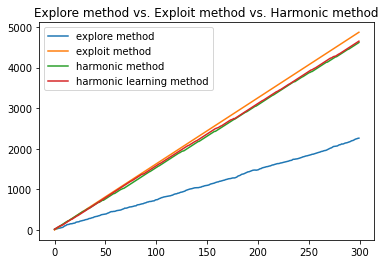

In [317]:
explore_sum, explore_array = explore_method()
exploit_sum, exploit_array = exploit_method()
harmonic_sum, harmonic_array = harmonic_method()
learning_sum,learning_array = harmonic_learning_method()
plt.plot(range(0,300),explore_array,label='explore method')
plt.plot(range(0,300),exploit_array,label='exploit method')
plt.plot(range(0,300),harmonic_array,label='harmonic method')
plt.plot(range(0,300),learning_array,label='harmonic learning method')
plt.legend()
plt.title('Explore method vs. Exploit method vs. Harmonic method')
plt.show()

In [318]:
"""
Change dist_one, dist_two, and dist_three because we don't necessarily know the values on that particular day.

We will have to 
"""


"\nChange dist_one, dist_two, and dist_three because we don't necessarily know the values on that particular day.\n\nWe will have to \n"